In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
import random
from collections import deque

# CartPole environment
env = gym.make('CartPole-v1')

# Hyperparameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
learning_rate = 0.001
gamma = 0.95  # Discount factor for future rewards
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 8
episodes = 100

# Memory to store experiences (state, action, reward, next_state, done)
memory = deque(maxlen=200)  # Significantly reduced memory size

#  build model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, input_dim=state_size, activation='relu'))  # Fewer neurons
    model.add(layers.Dense(8, activation='relu'))  # Fewer neurons
    model.add(layers.Dense(action_size, activation='linear'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model


model = build_model()

# select action using epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return random.randrange(action_size)  # Exploration
    q_values = model.predict(state, verbose=0)
    return np.argmax(q_values[0])  # Exploitation

#  replay training
def replay():
    if len(memory) < batch_size:
        return  # Not enough samples to train

    minibatch = random.sample(memory, batch_size)
    states, targets = [], []
    for state, action, reward, next_state, done in minibatch:
        target = reward
        if not done:
            target += gamma * np.max(model.predict(next_state, verbose=0)[0])
        target_f = model.predict(state, verbose=0)
        target_f[0][action] = target
        states.append(state)
        targets.append(target_f)

    # Train on the batch
    model.fit(np.vstack(states), np.vstack(targets), epochs=1, verbose=0)

# Main loop
for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    for time in range(200):
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])

        # Modify the reward if the episode ends
        reward = reward if not done else -10

        # Store experience in memory
        memory.append((state, action, reward, next_state, done))

        # Move to the next state
        state = next_state

        # End episode if done
        if done:
            print(f"Episode: {e+1}/{episodes}, Score: {time}, Epsilon: {epsilon:.2f}")
            break

        # Training the model using replay memory
        replay()

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

env.close()


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/us

Episode: 1/100, Score: 41, Epsilon: 1.00
Episode: 2/100, Score: 13, Epsilon: 0.99
Episode: 3/100, Score: 10, Epsilon: 0.99
Episode: 4/100, Score: 38, Epsilon: 0.99
Episode: 5/100, Score: 24, Epsilon: 0.98
Episode: 6/100, Score: 20, Epsilon: 0.98
Episode: 7/100, Score: 9, Epsilon: 0.97
Episode: 8/100, Score: 10, Epsilon: 0.97
Episode: 9/100, Score: 9, Epsilon: 0.96
Episode: 10/100, Score: 10, Epsilon: 0.96
Episode: 11/100, Score: 21, Epsilon: 0.95
Episode: 12/100, Score: 17, Epsilon: 0.95
Episode: 13/100, Score: 9, Epsilon: 0.94
Episode: 14/100, Score: 35, Epsilon: 0.94
Episode: 15/100, Score: 30, Epsilon: 0.93
Episode: 16/100, Score: 11, Epsilon: 0.93
Episode: 17/100, Score: 15, Epsilon: 0.92
Episode: 18/100, Score: 13, Epsilon: 0.92
Episode: 19/100, Score: 17, Epsilon: 0.91
Episode: 20/100, Score: 14, Epsilon: 0.91
Episode: 21/100, Score: 19, Epsilon: 0.90
Episode: 22/100, Score: 31, Epsilon: 0.90
Episode: 23/100, Score: 13, Epsilon: 0.90
Episode: 24/100, Score: 22, Epsilon: 0.89
Epis

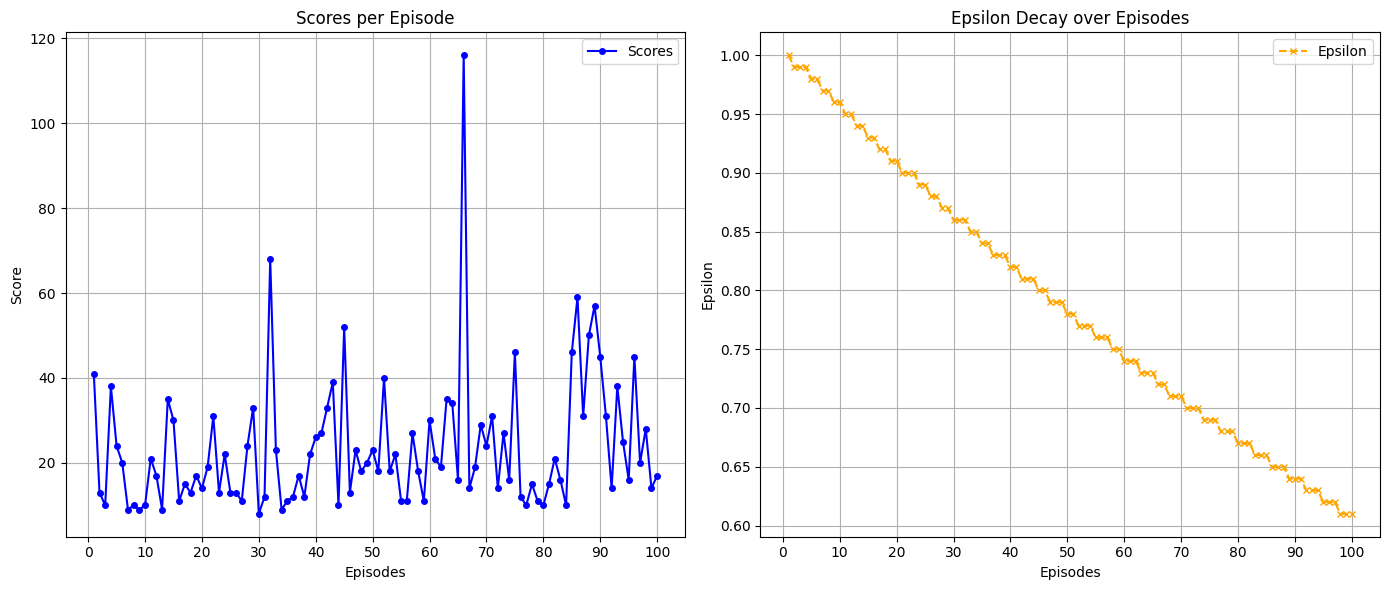

In [3]:
import matplotlib.pyplot as plt


episodes = list(range(1, 101))


scores = [
    41, 13, 10, 38, 24, 20, 9, 10, 9, 10,
    21, 17, 9, 35, 30, 11, 15, 13, 17, 14,
    19, 31, 13, 22, 13, 13, 11, 24, 33, 8,
    12, 68, 23, 9, 11, 12, 17, 12, 22, 26,
    27, 33, 39, 10, 52, 13, 23, 18, 20, 23,
    18, 40, 18, 22, 11, 11, 27, 18, 11, 30,
    21, 19, 35, 34, 16, 116, 14, 19, 29, 24,
    31, 14, 27, 16, 46, 12, 10, 15, 11, 10,
    15, 21, 16, 10, 46, 59, 31, 50, 57, 45,
    31, 14, 38, 25, 16, 45, 20, 28, 14, 17
]

epsilon_values = [
    1.00, 0.99, 0.99, 0.99, 0.98, 0.98, 0.97, 0.97, 0.96, 0.96,
    0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.92, 0.92, 0.91, 0.91,
    0.90, 0.90, 0.90, 0.89, 0.89, 0.88, 0.88, 0.87, 0.87, 0.86,
    0.86, 0.86, 0.85, 0.85, 0.84, 0.84, 0.83, 0.83, 0.83, 0.82,
    0.82, 0.81, 0.81, 0.81, 0.80, 0.80, 0.79, 0.79, 0.79, 0.78,
    0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.75, 0.75, 0.74,
    0.74, 0.74, 0.73, 0.73, 0.73, 0.72, 0.72, 0.71, 0.71, 0.71,
    0.70, 0.70, 0.70, 0.69, 0.69, 0.69, 0.68, 0.68, 0.68, 0.67,
    0.67, 0.67, 0.66, 0.66, 0.66, 0.65, 0.65, 0.65, 0.64, 0.64,
    0.64, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.61, 0.61, 0.61
]


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(episodes, scores, marker='o', color='blue', label='Scores', linestyle='-', markersize=4)
plt.title('Scores per Episode')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.xticks(range(0, 101, 10))
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(episodes, epsilon_values, marker='x', color='orange', label='Epsilon', linestyle='--', markersize=4)
plt.title('Epsilon Decay over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.xticks(range(0, 101, 10))
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()
